# Certamen de Simulación Estocástica - Pregunta 3
- Diego Astaburuaga

**III.** En esta pregunta se busca simular funciones de $L^2(\Omega)$. Para esto, recordamos que una función $f(t)\in L^2(\Omega)$ se puede escribir mediante una secuencia de bases ortogonales $\{\phi_i\}_{i=0}^\infty$ y una secuencia de números reales $\{\kappa_i\}_{i=0}^\infty$ como

$$
f(t):=f(t,\{\kappa_i\}_{i=0}^\infty)=\sum_{i=0}^\infty\kappa_i\phi_i(t)
$$

Considernando la secuencia de variables aleatorias independientes $\{S_k\}_{k=0}^\infty$ donde $S_k$ proviene de una distribución $Beta(1-\alpha,\theta +\alpha k)$. Se puede demostrar que el proceso $W_k=S_k\Pi_{i=0}^{k-1}(1-S_i)$ satisface que $W_k>0$ para todo número $k$ y que además $\sum_{k=0}^\infty W_k=1$. Realice las simulaciones:

## a) Simular la secuencia $W_k$ para distintos valores de $\alpha$ y $\theta$. Describa lo observado y fundamente con gráficos apropiados.

Ideas:

- Entender $W_k$ como una serie de tiempo para comparar entre distintos parameters.
    - Trabajar $W_k$ como datos y calcular su varianza y gráficarla versus los parametros.
    - Entender si existe tendencia en $W_k$ para los distintos parametros (considerar log(y)=x+\epsilon).

In [335]:
# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import beta

import sys

In [336]:
def simulate_Wk(n_max, alpha, theta, tol=0, n_min=None):
    """
    Simulate an array of W_k values of size n_max based on given specifications.
    
    Args:
        n_max (int): Size of the array.
        alpha (float): Alpha parameter of the beta distribution.
        theta (float): Theta parameter of the beta distribution.
        tol (float): Tolerance for the sum of W_k to reach 1.

    Returns:
        numpy.ndarray: Array of simulated W_k values.
    """

    if n_min is None:
        n_min = n_max
    # Initialize arrays for S_k and W_k
    Sk = []
    Wk = []

    # Simulate the first S_k
    new = beta(1 - alpha, theta).rvs(1)
    Sk.append(new[0])

    # Calculate the first W_k
    Wk.append(Sk[0])

    k = 1

    product_term = 1
    # Continue simulating until the sum of W_k is close to 1
    while (np.abs(1 - np.sum(Wk)) > tol or k < n_min) and k < n_max:
        # Simulate the next S_k
        new = beta(1 - alpha, theta + alpha * k).rvs(1)
        Sk.append(new[0])

        # Calculate the next W_k
        product_term *= (1 - Sk[k-1])
        Wk.append(Sk[k] * product_term)
        
        k += 1

    # Return the simulated W_k values
    return Wk

# Define the parameters
n_max = 1_000
alpha = 0.5
theta = 5.0

# Simulate W_k values
Wk = simulate_Wk(n_max, alpha, theta, tol = 0.1, n_min = 10)

# Calculate the difference between the sum of W_k and 1
difference = np.abs(np.sum(Wk) - 1)

#Calculate the len
k = len(Wk)

# Print the result
print(f'Difference between the sum of W_k and 1: {difference:.4f} con {k=}')

Difference between the sum of W_k and 1: 0.0978 con k=55


Note que en $Beta(1-\alpha,\theta +\alpha k)$, existe la condición de que las entradas de la distribución deben ser no negativos para todo $k\in \mathbb{N}$, por lo tanto $\alpha\in(0,1)$ y $\theta>0$

Notese que para varios posibles valores de $\alpha$ y $\theta$ se debería verificar computacionalmente que la suma de la sucesión $W_k$ efectivamente da 1, como son terminos positivos y estamos truncando la sucesión, esta debería ser cercana 1, en efecto:

experimentando con distintos largos de la cadena $W_k$ se deduce que para tener una cadena significativa en el sentido que todos los valores sumen 1 aproximadamente, hay que trabajar con valores altos. En lo siguiente se puede deducir que según los valores de $\theta$ y $\alpha$, se requieren más o menos valores para alcanzar la tolerancia.

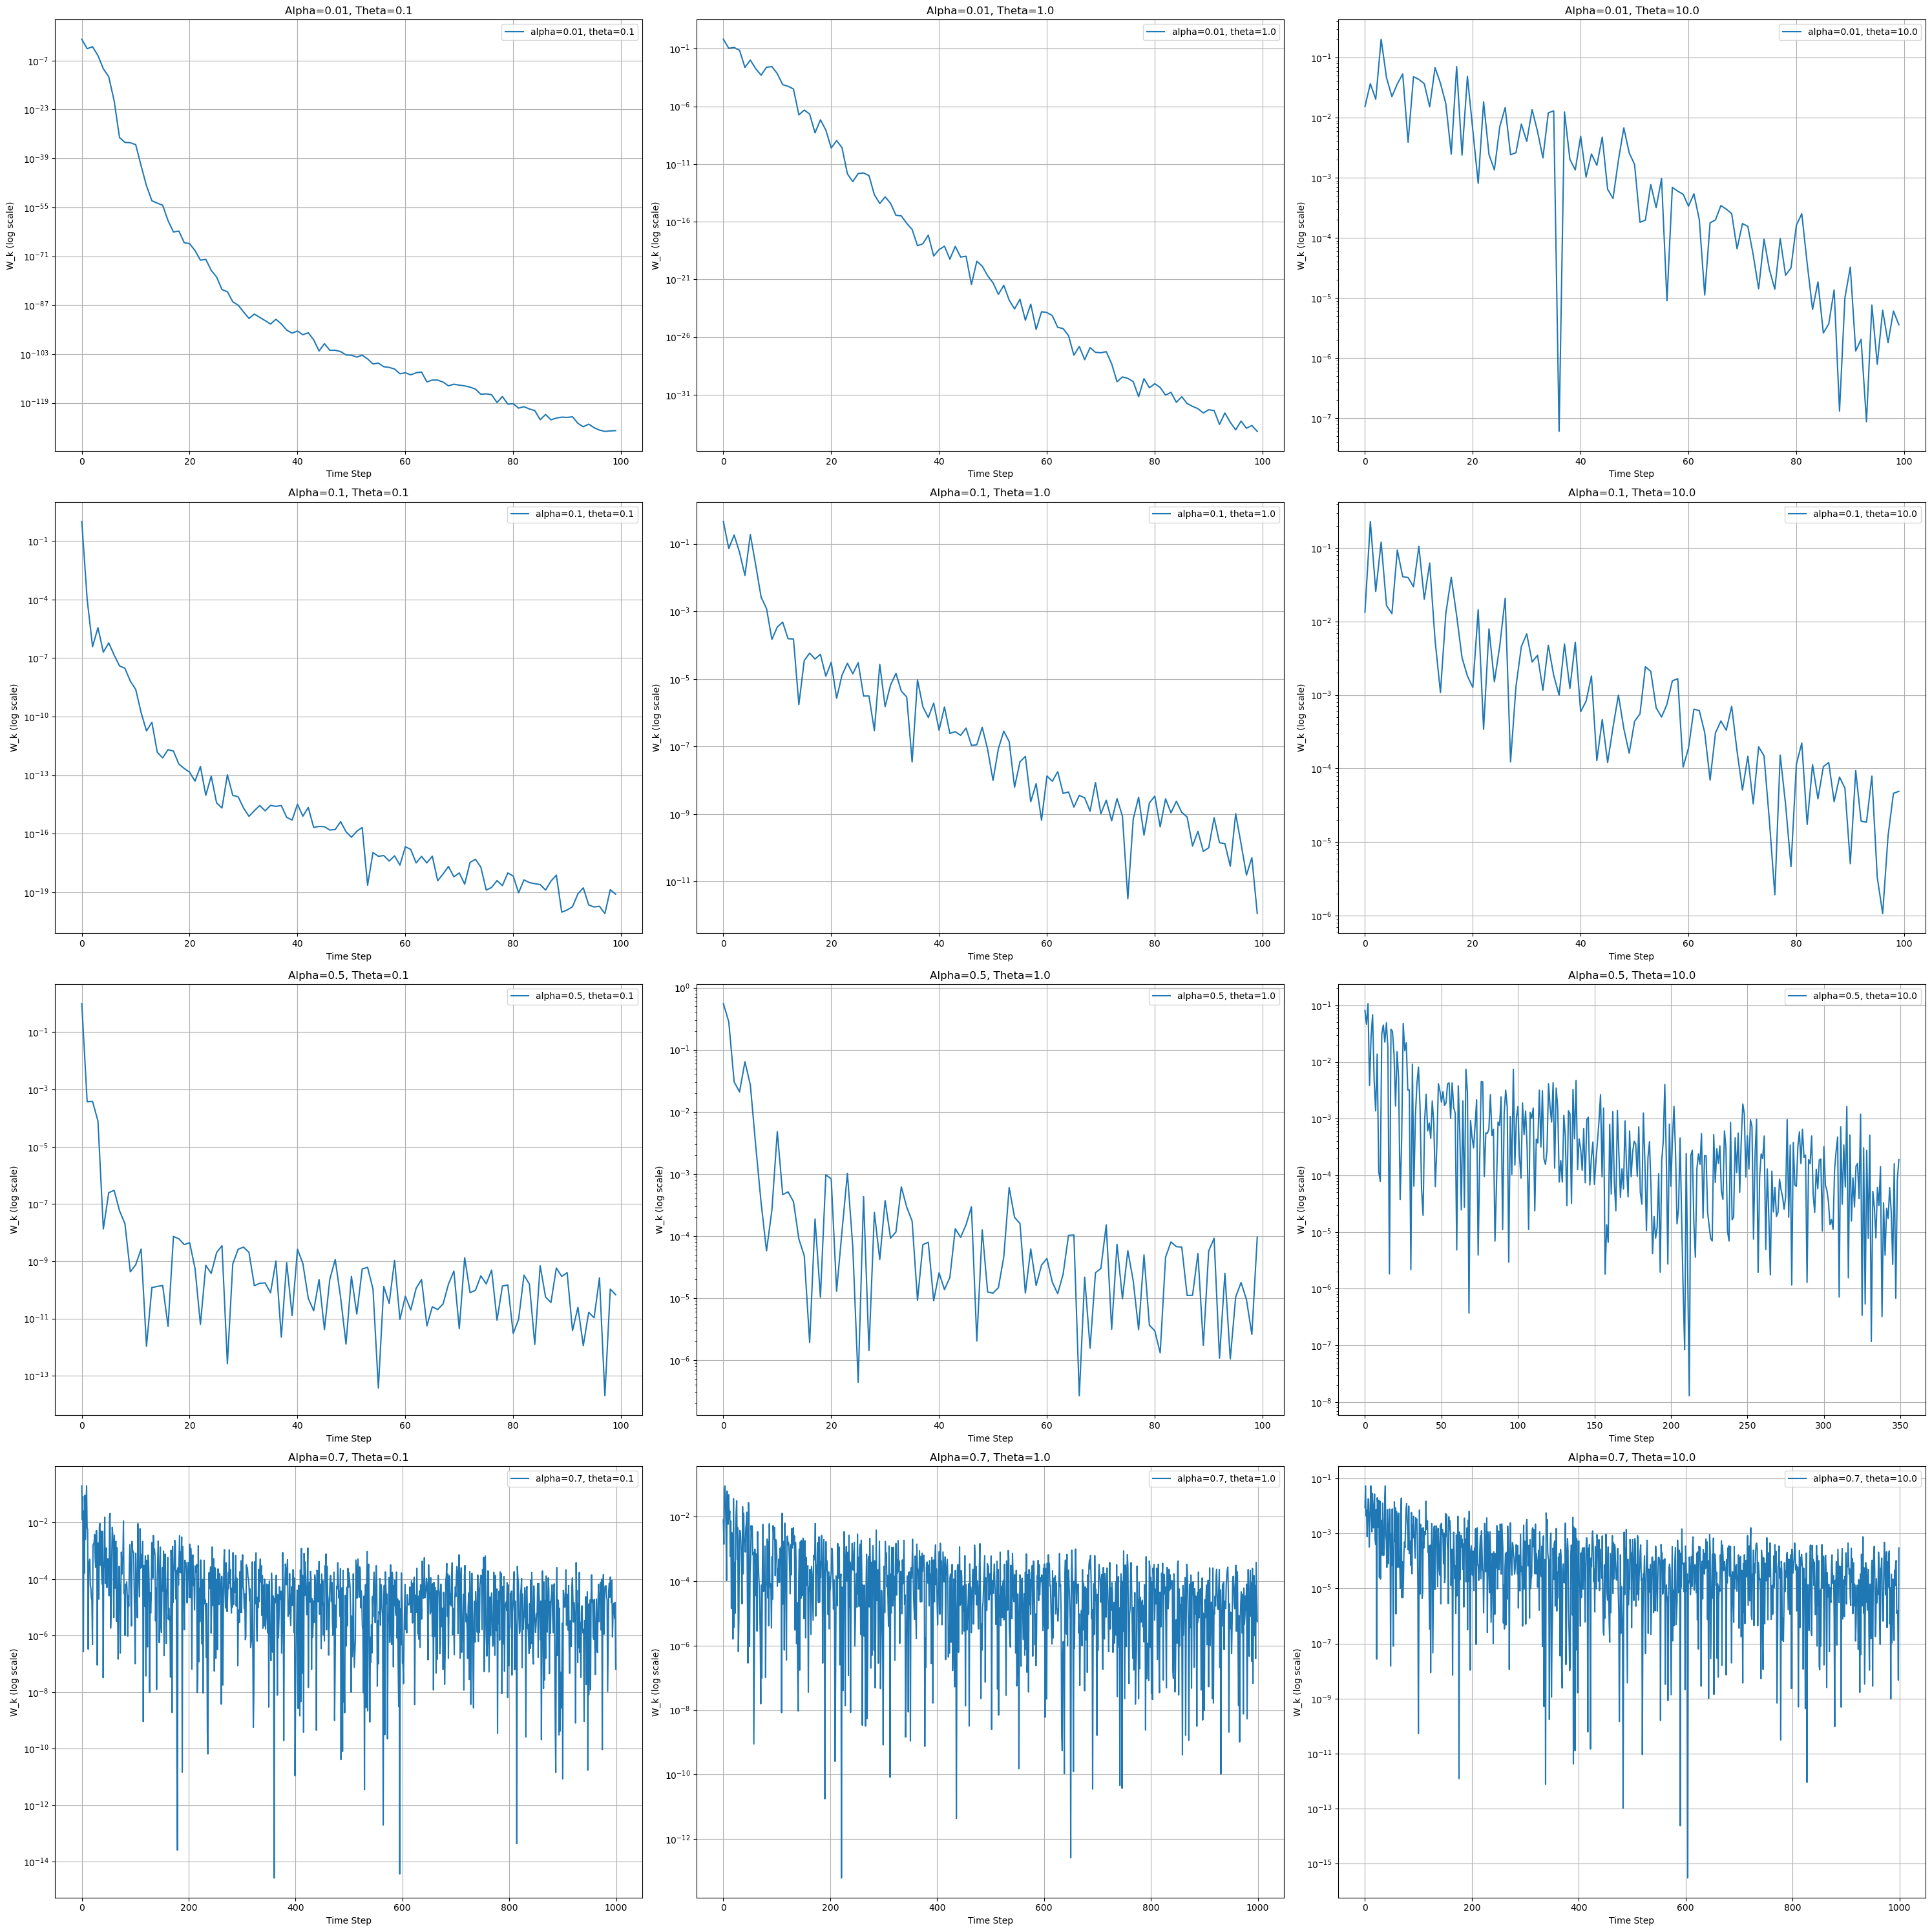

In [337]:
# Definir parámetros y configuración
n_max = int(1e3)  # Tamaño maximo de la serie de tiempo
alpha_grid = [0.01, 0.1, 0.5, 0.7]  # Valores de alpha
theta_grid = np.logspace(-1, 1, 3 )  # Valores de theta

num_plots = len(alpha_grid) * len(theta_grid)  # Número total de gráficos

# Crear subplots para cada combinación de alpha y theta
fig, axes = plt.subplots(len(alpha_grid), len(theta_grid), figsize=(30, 30))

# Iterar a través de los valores de alpha y theta
for i, alpha in enumerate(alpha_grid):
    for j, theta in enumerate(theta_grid):
        # Simular la serie de tiempo utilizando simulate_Wk
        Wk = simulate_Wk(n_max, alpha, theta, tol=0.05, n_min=100)
        
        # Graficar la serie de tiempo en el subplot correspondiente
        ax = axes[i, j]
        ax.plot(np.arange(len(Wk)), Wk, label=f'alpha={alpha}, theta={theta}')
        ax.set_xlabel('Time Step')
        ax.set_ylabel('W_k (log scale)')
        ax.set_yscale('log')  # Establecer escala logarítmica en el eje Y
        ax.set_title(f'Alpha={alpha}, Theta={theta}')
        ax.grid(True)
        ax.legend()

# Ajustar el espacio entre subplots
plt.tight_layout()

# Mostrar los gráficos
plt.show()

- Valores con serie que llegan a 1000 significa que no alcazarón la convergencia a 1 con una tolerancia de $0.05$.
- Se observa que para $\alpha\geq 0.8$ hay una clara convergencia lenta, por ende por el bien del computo, se usarán valores de $\alpha$ que permitan tener una convergencia rapida, es decir, $\alpha\leq 0.5$.
- Mediante varios ejemplos de simulación como el anterior, se considerará que utilizar $\alpha \in (0,0.5)$ por la convergencia que presenta para $\theta$ en el rango mostrado.
- Se observa que de forma clara, a mayor $\theta$, mayor es la cantidad de iteraciones necesarias hasta alcanzar la convergencia.
- Se pueden hacer experimentos exhaustivos de simulación para determinar el número esperado de simulaciones para alcanzar una cierta tolerancia dados parámetros $\alpha$ y $\theta$, los cuales no se realizan el favor de la longitud del documento.

Importante: A partir de ahora y según lo observado en los puntos anteriores, utilizaremos $\alpha\in (0.1, 0.5]$ y $\theta \in (0,10]$ en favor de los tiempos de computo y velocidad de convergencia de $W_k$.

Además viendo el gráfico generado, se puede conjeturar que el valor de $\alpha$ determina en cierta forma que tan rápido decrecen los valores de la sucesión $W_k$ mientras que $\theta$ parece que al ser mayor aumenta la varianza...

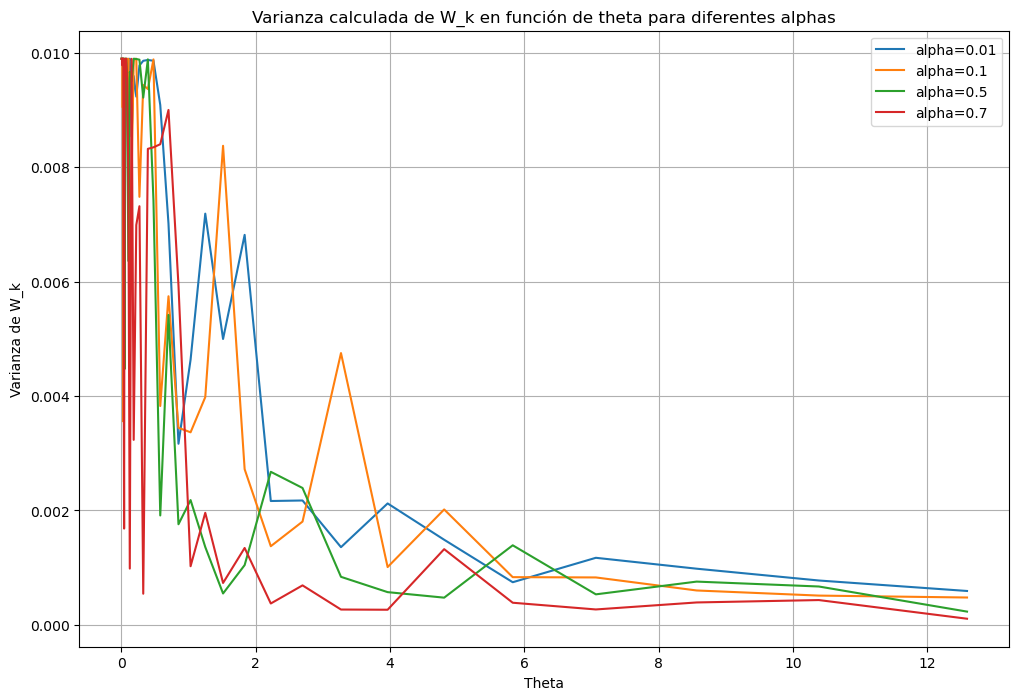

In [338]:
theta_values = np.logspace(-3, 1.1, 50)
n_max = 100

# Valores de alpha a considerar
alphas = [0.01, 0.1, 0.5, 0.7]

# Lista para almacenar las varianzas para cada alpha
variances = []

# Simular cadenas de W_k para valores variados de theta y alpha
plt.figure(figsize=(12, 8))

for alpha in alphas:
    Wk_chains = [simulate_Wk(n_max, alpha, theta, tol = 0, n_min=n_max) for theta in theta_values]
    Wk_variances = [np.var(Wk) for Wk in Wk_chains]
    variances.append(Wk_variances)
    plt.plot(theta_values, Wk_variances, label=f'alpha={alpha}')

plt.title(f'Varianza calculada de W_k en función de theta para diferentes alphas')
plt.xlabel('Theta')
plt.ylabel('Varianza de W_k')
plt.legend()
plt.grid()
plt.show()

Se comenta que para $\theta$ grande, la varianza de la serie es baja, mientras que para $\theta$ bajo, está es alta. Respecto al valor de $\alpha$, para $\alpha$ cercano a $1$ la varianza cae bruscamente mientras que para el resto de casos, parecen tener el mismo comportamiento.

## b) Usando la representación para la funciones $L^2$, genere un código que pueda generar funciones que satisfacen que:

### 1) Sean periódicas y pares en $L^2([-1,1])$.

Para esta parte considere la base ortonormal de $L^2([0,L])$ dada por:

$$
S = \left\{\sqrt{\frac{2}{L}}\cos\left(\frac{k\pi}{L}x\right)\right\}_{k=0}^\infty
$$

que se puede escribir en este caso de $L^2([-1,1])$ como:

$$
S = \left\{cos\left(\frac{k\pi}{2}(x+1)\right)\right\}_{k=0}^\infty
$$

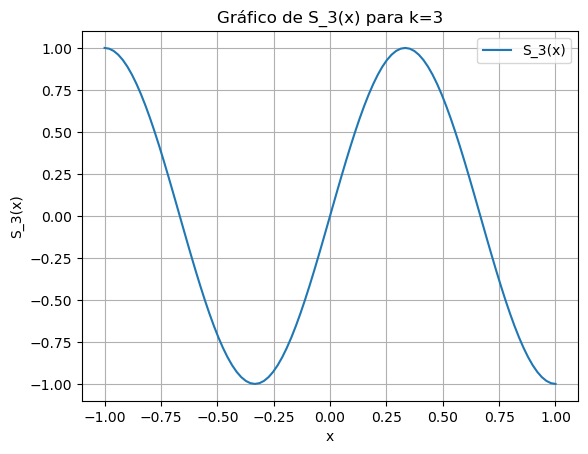

In [339]:
import sympy as sp
import numpy as np
import matplotlib.pyplot as plt

# Define el símbolo x
x = sp.symbols('x')

def periodic_base(k):
    """
    Generate the periodic base function S_k for a given k.

    Args:
        k (int): The parameter k for S_k.

    Returns:
        sympy expression: S_k(x) as a SymPy expression.
    """
    Sk = sp.cos(k * sp.pi / 2 * (x + 1))
    return Sk

# Ejemplo de uso
k = 3  # Cambia k al valor que desees
Sk = periodic_base(k)

# Convertir la expresión SymPy a una función numpy
Sk_function = sp.lambdify(x, Sk, 'numpy')

# Crear un array de valores de x
x_values = np.linspace(-1, 1, 100)

# Evaluar la función S_k en los valores de x
y_values = Sk_function(x_values)

# Graficar la función
plt.plot(x_values, y_values, label=f'S_{k}(x)')
plt.xlabel('x')
plt.ylabel(f'S_{k}(x)')
plt.title(f'Gráfico de S_{k}(x) para k={k}')
plt.grid(True)
plt.legend()
plt.show()

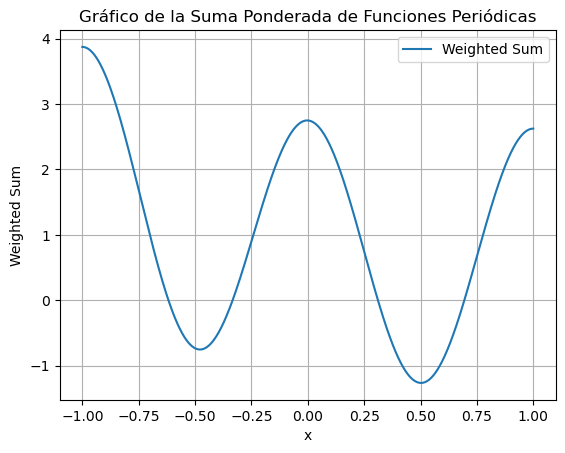

In [340]:
import sympy as sp
import numpy as np

# Define el símbolo x
x = sp.symbols('x')

def periodic_base(k):
    """
    Generate the periodic base function S_k for a given k.

    Args:
        k (int): The parameter k for S_k.

    Returns:
        sympy expression: S_k(x) as a SymPy expression.
    """
    Sk = sp.cos(k * sp.pi / 2 * (x + 1))
    return Sk

def calculate_weighted_sum(Wk):
    """
    Calculate the weighted sum of periodic functions for a given list of weights Wk.

    Args:
        Wk (list or numpy.ndarray): List of weights.

    Returns:
        sympy expression: The weighted sum of periodic functions.
    """
    n = len(Wk)
    weighted_sum = 0
    for i in range(n):
        # Generar la función periódica f_i para n=i
        fi = periodic_base(i)
        # Sumar w_i * f_i al resultado
        weighted_sum += Wk[i] * fi
    return weighted_sum

# Ejemplo de uso
Wk = [1, 0.5, 0.25, 0.125, 2]  # Cambia los valores de Wk según sea necesario

# Calcular la suma ponderada de funciones periódicas
weighted_sum = calculate_weighted_sum(Wk)

# Convertir la expresión SymPy a una función numpy
weighted_sum_function = sp.lambdify(x, weighted_sum, 'numpy')

# Crear un array de valores de x
x_values = np.linspace(-1, 1, 1000)

# Evaluar la función ponderada en los valores de x
y_values = weighted_sum_function(x_values)

# Graficar la función ponderada
import matplotlib.pyplot as plt

plt.plot(x_values, y_values, label='Weighted Sum')
plt.xlabel('x')
plt.ylabel('Weighted Sum')
plt.title('Gráfico de la Suma Ponderada de Funciones Periódicas')
plt.grid(True)
plt.legend()
plt.show()

In [350]:
# Define el símbolo x
x = sp.symbols('x')

# Simular Wk con los valores de alpha y theta predefinidos
n_max = 100  # Tamaño máximo de la secuencia
alpha = 0.3  # Valor de alpha predefinido
theta = 1.0  # Valor de theta predefinido

Wk = simulate_Wk(n_max, alpha, theta)

# Calcular la suma ponderada de funciones periódicas
weighted_sum = calculate_weighted_sum(Wk)

# Convertir la expresión SymPy a una función numpy
weighted_sum_function = sp.lambdify(x, weighted_sum, 'numpy')

# Crear un array de valores de x
x_values = np.linspace(-1, 1, 1000)

# Evaluar la función ponderada en los valores de x
y_values = weighted_sum_function(x_values)

# Graficar la función ponderada
import matplotlib.pyplot as plt

plt.plot(x_values, y_values, label='Weighted Sum')
plt.xlabel('x')
plt.ylabel('Weighted Sum')
plt.title('Gráfico de la Suma Ponderada de Funciones Periódicas')
plt.grid(True)
plt.legend()
plt.show()

TypeError: periodic_base() missing 1 required positional argument: 'x'

ANTIGUO

In [343]:
def periodic_base(k, x):
    """
    Calculate the value of the periodic base function: cos(k * π * (x+1) / 2).

    Args:
        k (float, array-like): The 'k' parameter (scalar or array).
        x (float, array-like): The 'x' value(s) at which to evaluate the function (scalar, list, or array).

    Returns:
        array-like: The result(s) of cos(k * π * (x+1) / 2) as a matrix.
    """
    # Ensure k and x are arrays for element-wise operation
    k = np.array(k)
    x = np.array(x)

    # Calculate the result as a matrix using the outer product
    return np.cos(np.outer(k, np.pi * (x+1) / 2))

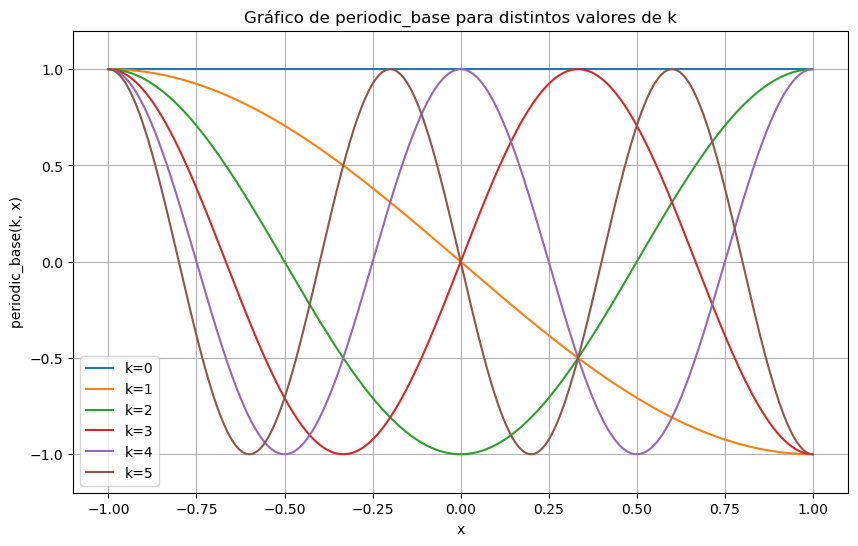

In [344]:
# Definir el rango de x
x = np.linspace(-1, 1, 1000)

# Valores de k
k_values = np.arange(0, 6)

# Crear subplots para cada valor de k
plt.figure(figsize=(10, 6))

for k in k_values:
    # Calcular la función periódica para el valor actual de k
    periodic_func = periodic_base(k, x)
    
    # Seleccionar la primera fila de periodic_func para trazarla
    periodic_func = periodic_func[0]
    
    # Graficar la función con un nombre específico para la leyenda
    plt.plot(x, periodic_func, label=f'k={k}')

# Configurar etiquetas y título
plt.xlabel('x')
plt.ylabel('periodic_base(k, x)')
plt.title('Gráfico de periodic_base para distintos valores de k')
plt.grid(True)
plt.legend()  # Mostrar leyenda con nombres de k
plt.ylim(-1.2, 1.2)  # Establecer límites en el eje y

# Mostrar el gráfico
plt.show()


functions corresponde a una matriz con todas las evaluaciones necesarias para los $k=0,1,...,9$ en los puntos $x\in (-5,5)$ de forma:
$$
\begin{pmatrix}
(k=0, x=0) & (k=0,x=1)  & (k=0,x=2)\\
(k=1, x=0) & (k=1,x=1)  & (k=1,x=2)\\
(k=2, x=0) & (k=2,x=1)  & (k=2,x=2)
\end{pmatrix}
$$

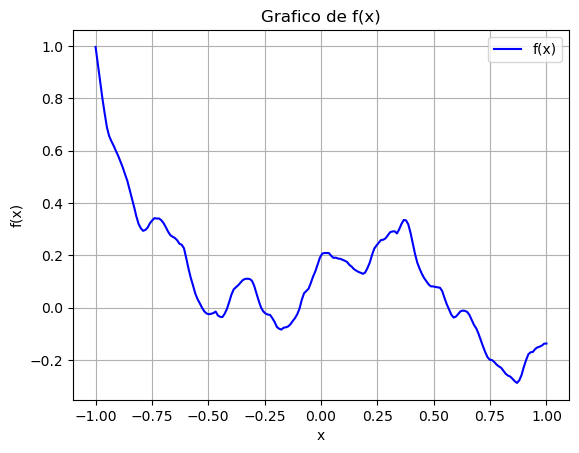

In [345]:
# Define the range for x values
x_min = -1
x_max = 1

k_max = 1000
n_max = 200

# Define alpha and theta parameters
alpha = 0.5
theta = 1

# Define the tolerance
tol = 0.1

# Create an array of x values
x = np.linspace(x_min, x_max, n_max)

# Simulate Wk values
Wk = simulate_Wk(k_max, alpha, theta, tol=tol, n_min=k_max)

i = 0
while np.abs(np.sum(Wk)-1) > tol:
    Wk = simulate_Wk(k_max, alpha, theta, tol=tol, n_min=k_max)
    i += 1
    if i == 10:
        print('Error: Try with other parameters or tolerance, there are problems with the convergence')


# Generate periodic base functions for different values of k
functions = periodic_base(np.arange(0, k_max), x)

# Calculate the function f by taking the dot product of functions and Wk
f = functions.T @ Wk

# Create the plot
plt.plot(x, f, label='f(x)', color='blue')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.title('Grafico de f(x)')
plt.grid(True)
plt.legend()
plt.show()


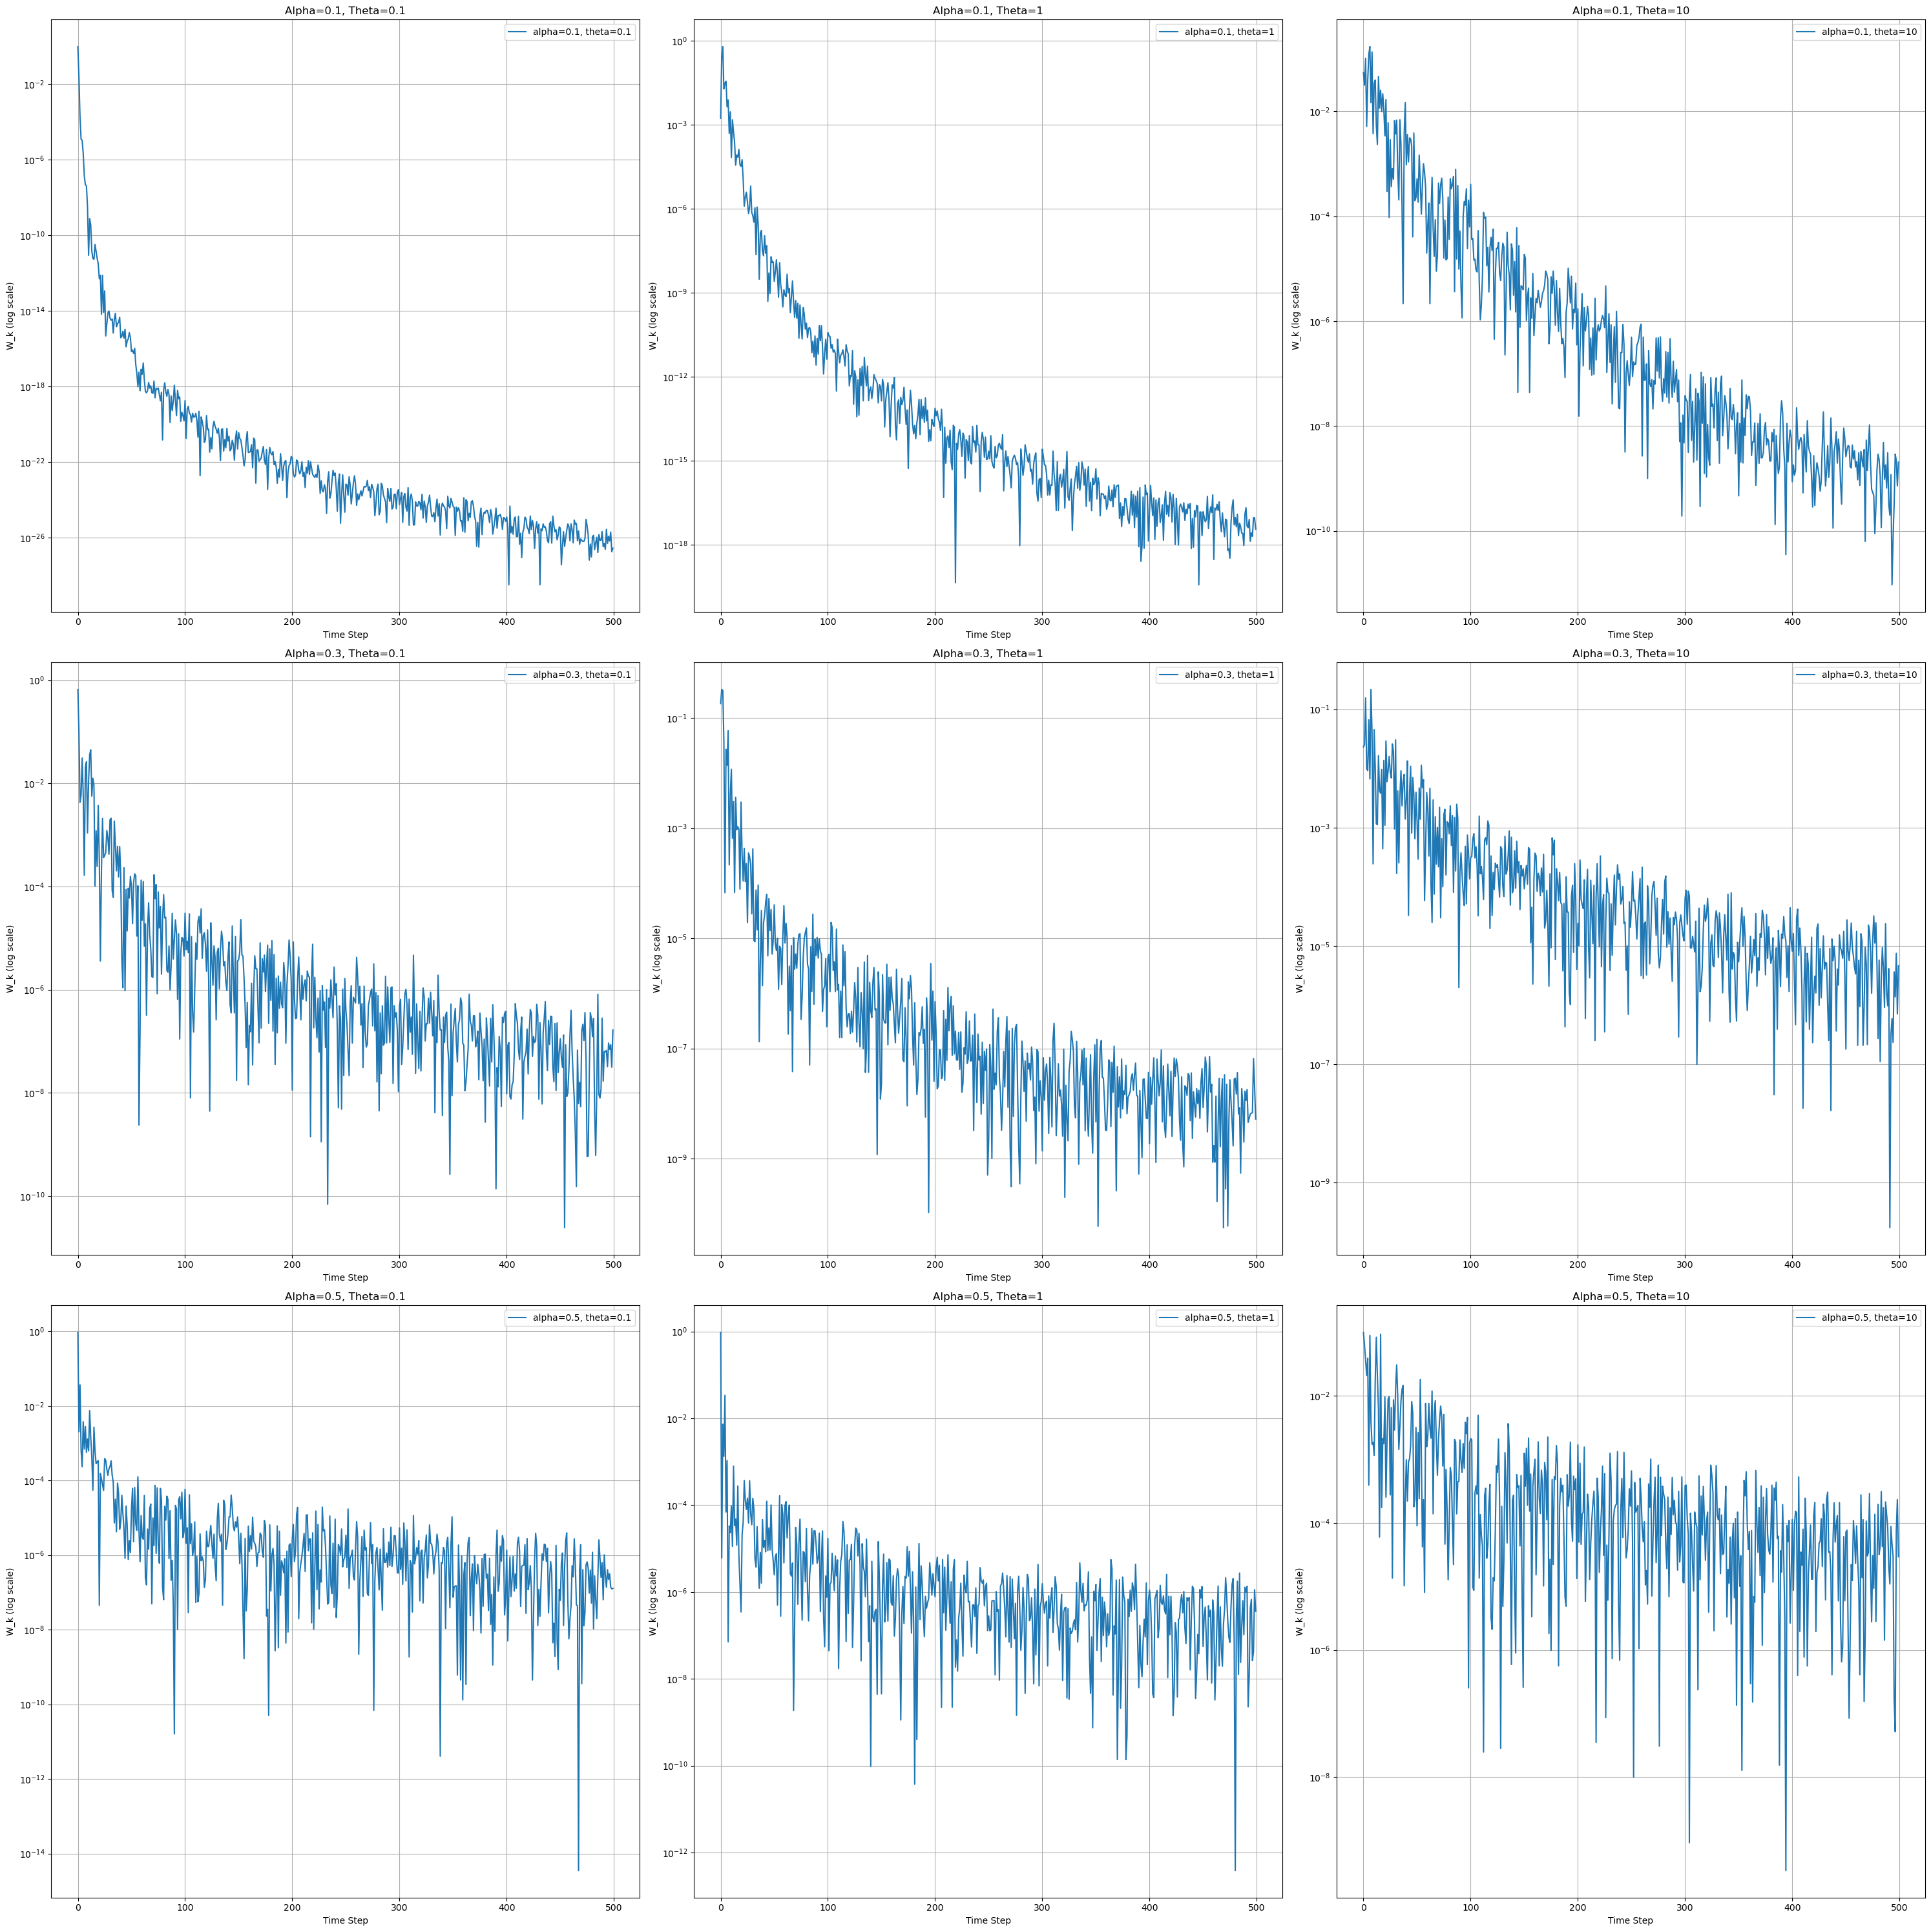

In [346]:
# Definir parámetros y configuración
n_max = 500 # Tamaño maximo de la serie de tiempo
alpha_grid = [0.1, 0.3, 0.5]  # Valores de alpha
theta_grid = [0.1, 1, 10]  # Valores de theta

num_plots = len(alpha_grid) * len(theta_grid)  # Número total de gráficos

# Crear subplots para cada combinación de alpha y theta
fig, axes = plt.subplots(len(alpha_grid), len(theta_grid), figsize=(30, 30))

# Iterar a través de los valores de alpha y theta
for i, alpha in enumerate(alpha_grid):
    for j, theta in enumerate(theta_grid):
        # Simular la serie de tiempo utilizando simulate_Wk
        Wk = simulate_Wk(n_max, alpha, theta, tol=0.05, n_min=n_max)
        
        # Graficar la serie de tiempo en el subplot correspondiente
        ax = axes[i, j]
        ax.plot(np.arange(len(Wk)), Wk, label=f'alpha={alpha}, theta={theta}')
        ax.set_xlabel('Time Step')
        ax.set_ylabel('W_k (log scale)')
        ax.set_yscale('log')  # Establecer escala logarítmica en el eje Y
        ax.set_title(f'Alpha={alpha}, Theta={theta}')
        ax.grid(True)
        ax.legend()

# Ajustar el espacio entre subplots
plt.tight_layout()

# Mostrar los gráficos
plt.show()

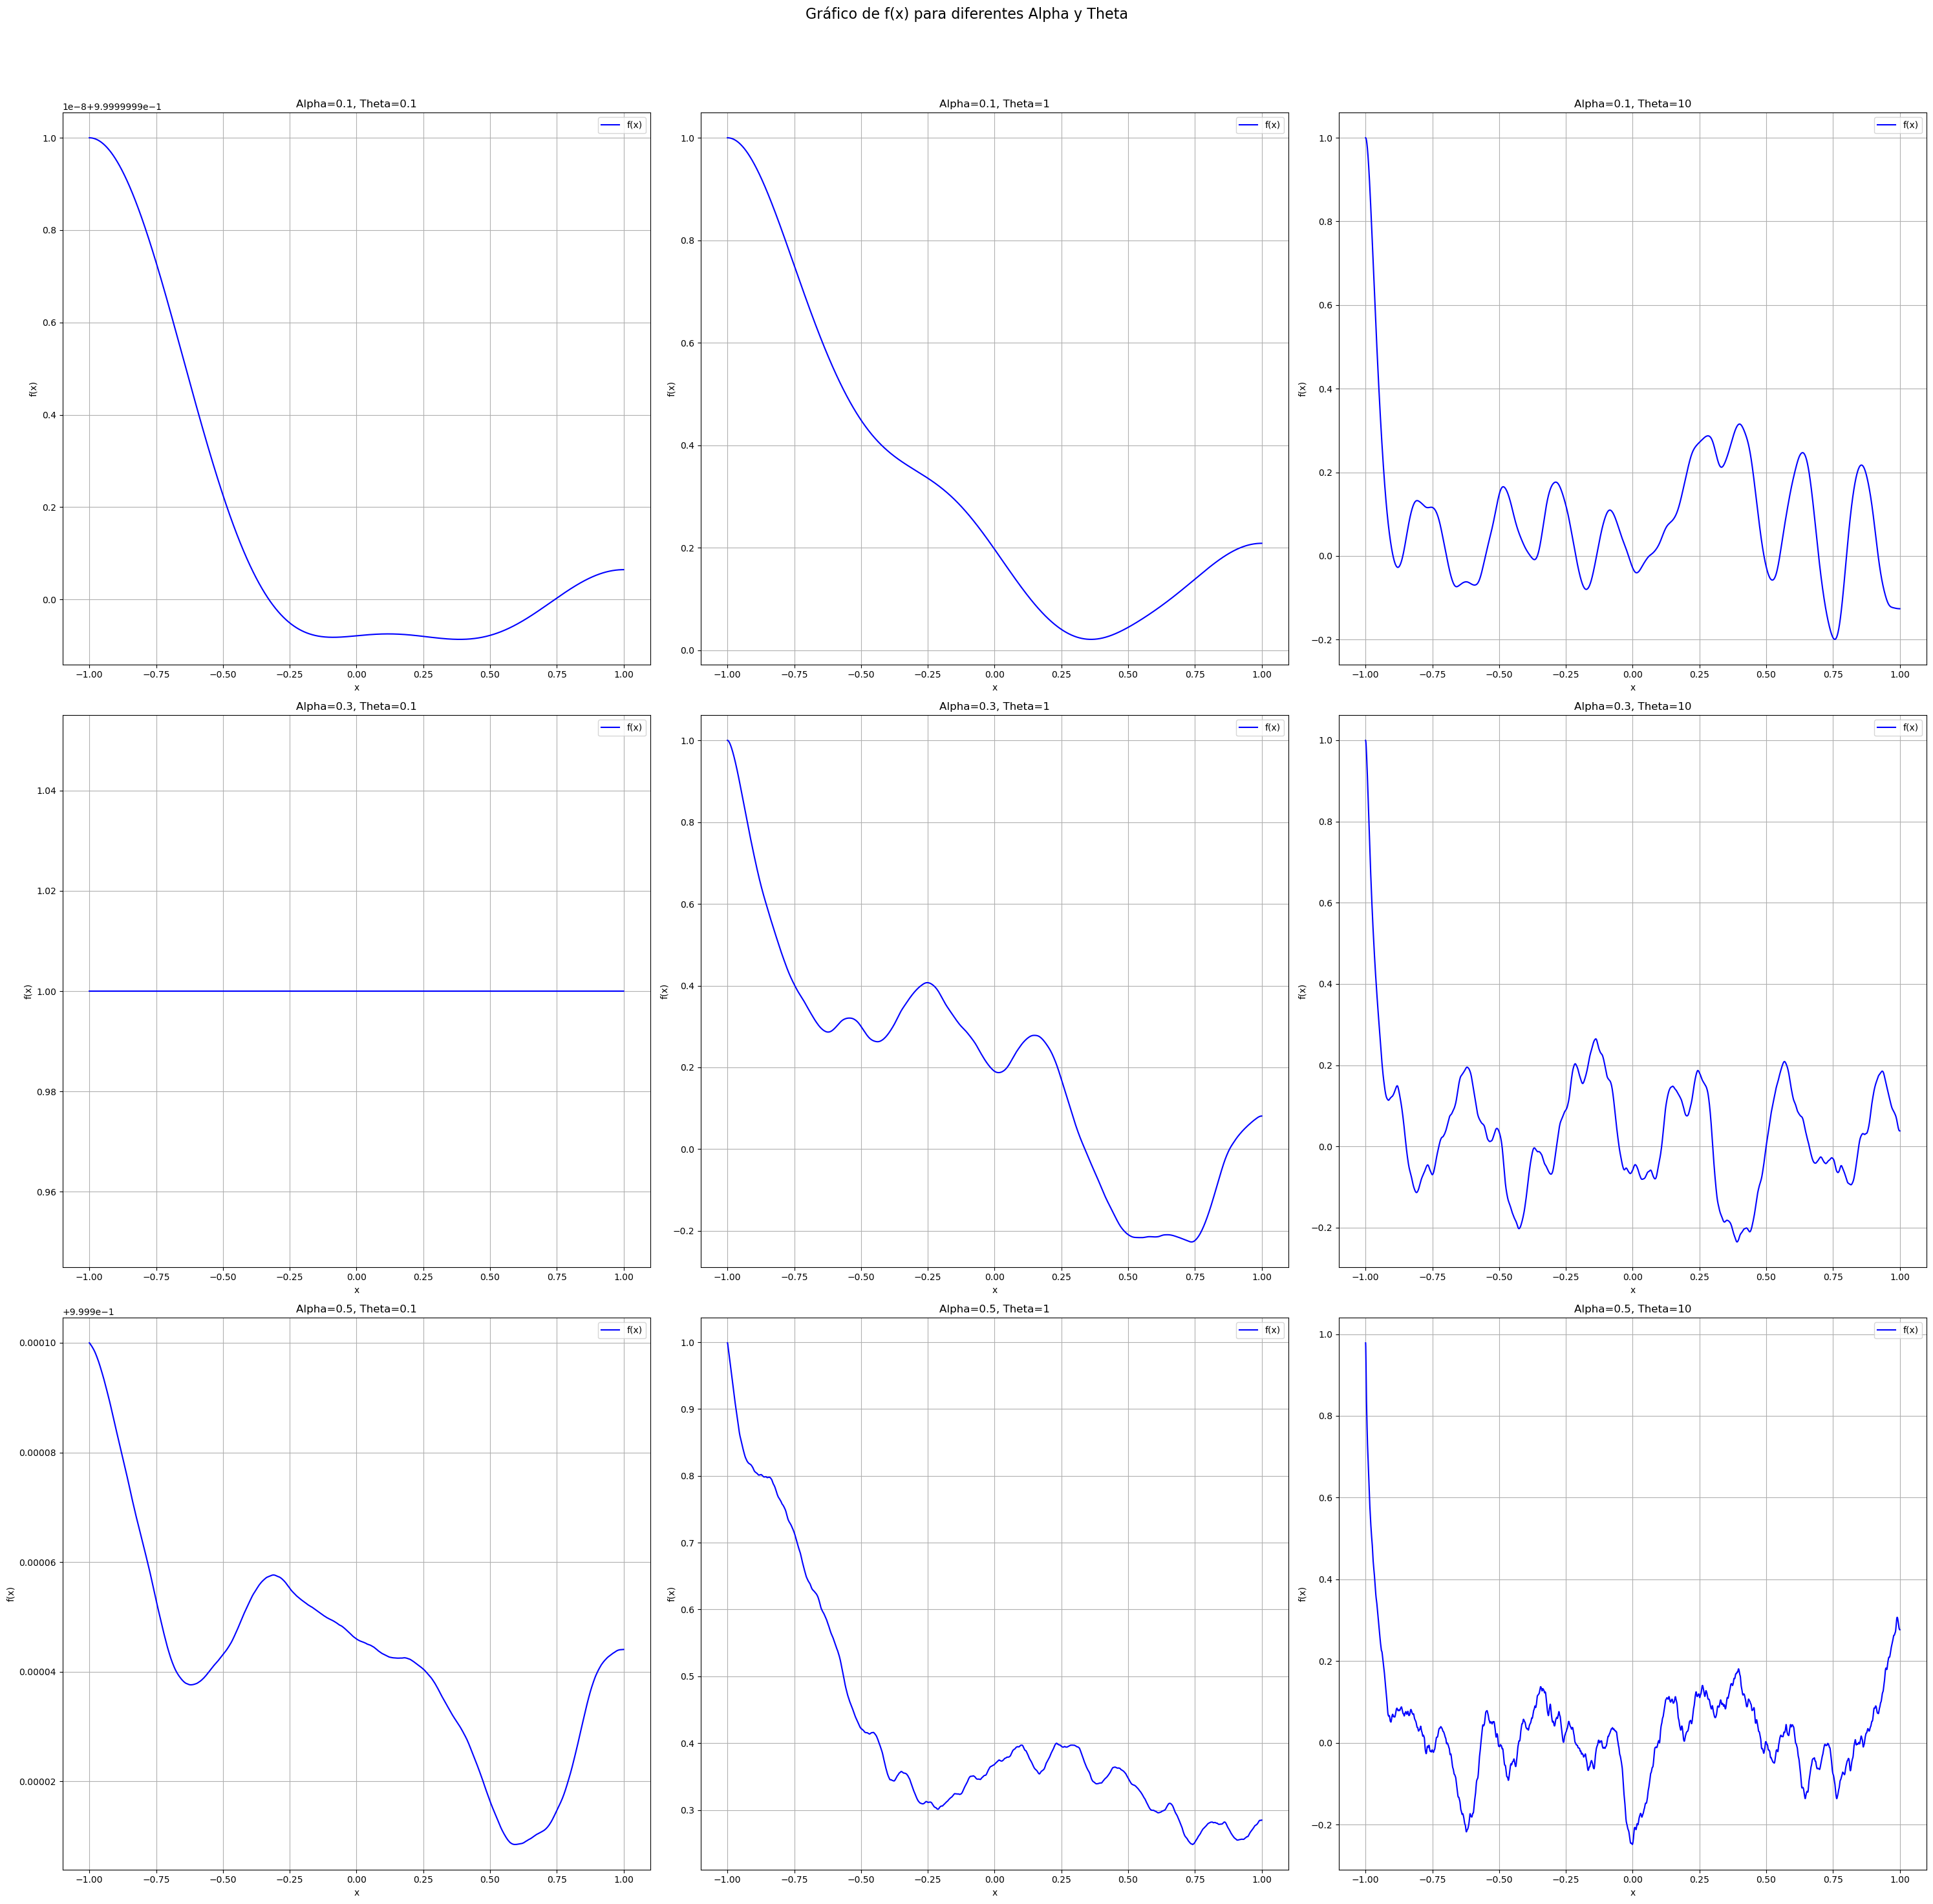

In [347]:
# Define the range for x values
x_min = -1
x_max = 1

# Define the maximum value for k and the size of the array
k_max = 1_000
n_max = 10_000

tol=0.1

# Define alpha and theta parameters
alpha_values = [0.1, 0.3, 0.5]
theta_values = [0.1, 1, 10]

# Create an array of x values
x = np.linspace(x_min, x_max, n_max)

# Create a 3x3 grid of plots
fig, axes = plt.subplots(3, 3, figsize=(30, 30))
fig.suptitle('Gráfico de f(x) para diferentes Alpha y Theta', fontsize=16)

# Iterate through alpha and theta values
for i, alpha in enumerate(alpha_values):
    for j, theta in enumerate(theta_values):
        ax = axes[i, j]
        ax.set_title(f'Alpha={alpha}, Theta={theta}')
        
        # Simulate Wk values
        Wk = simulate_Wk(k_max, alpha, theta, tol=tol, n_min=k_max)

        if np.abs(np.sum(Wk)-1) > tol: print(f'For {alpha=} y {theta=} the diff is {np.abs(1-np.sum(Wk))}')
        
        # Generate periodic base functions for different values of k
        functions = periodic_base(np.arange(0, k_max), x)
        
        # Calculate the function f by taking the dot product of functions and Wk
        f = functions.T @ Wk
        
        # Plot the function with the corresponding label
        ax.plot(x, f, label='f(x)', color='blue')
        ax.set_xlabel('x')
        ax.set_ylabel('f(x)')
        ax.grid(True)
        ax.legend()

# Adjust spacing between subplots
plt.tight_layout(rect=[0, 0, 1, 0.95])

# Show the plots
plt.show()

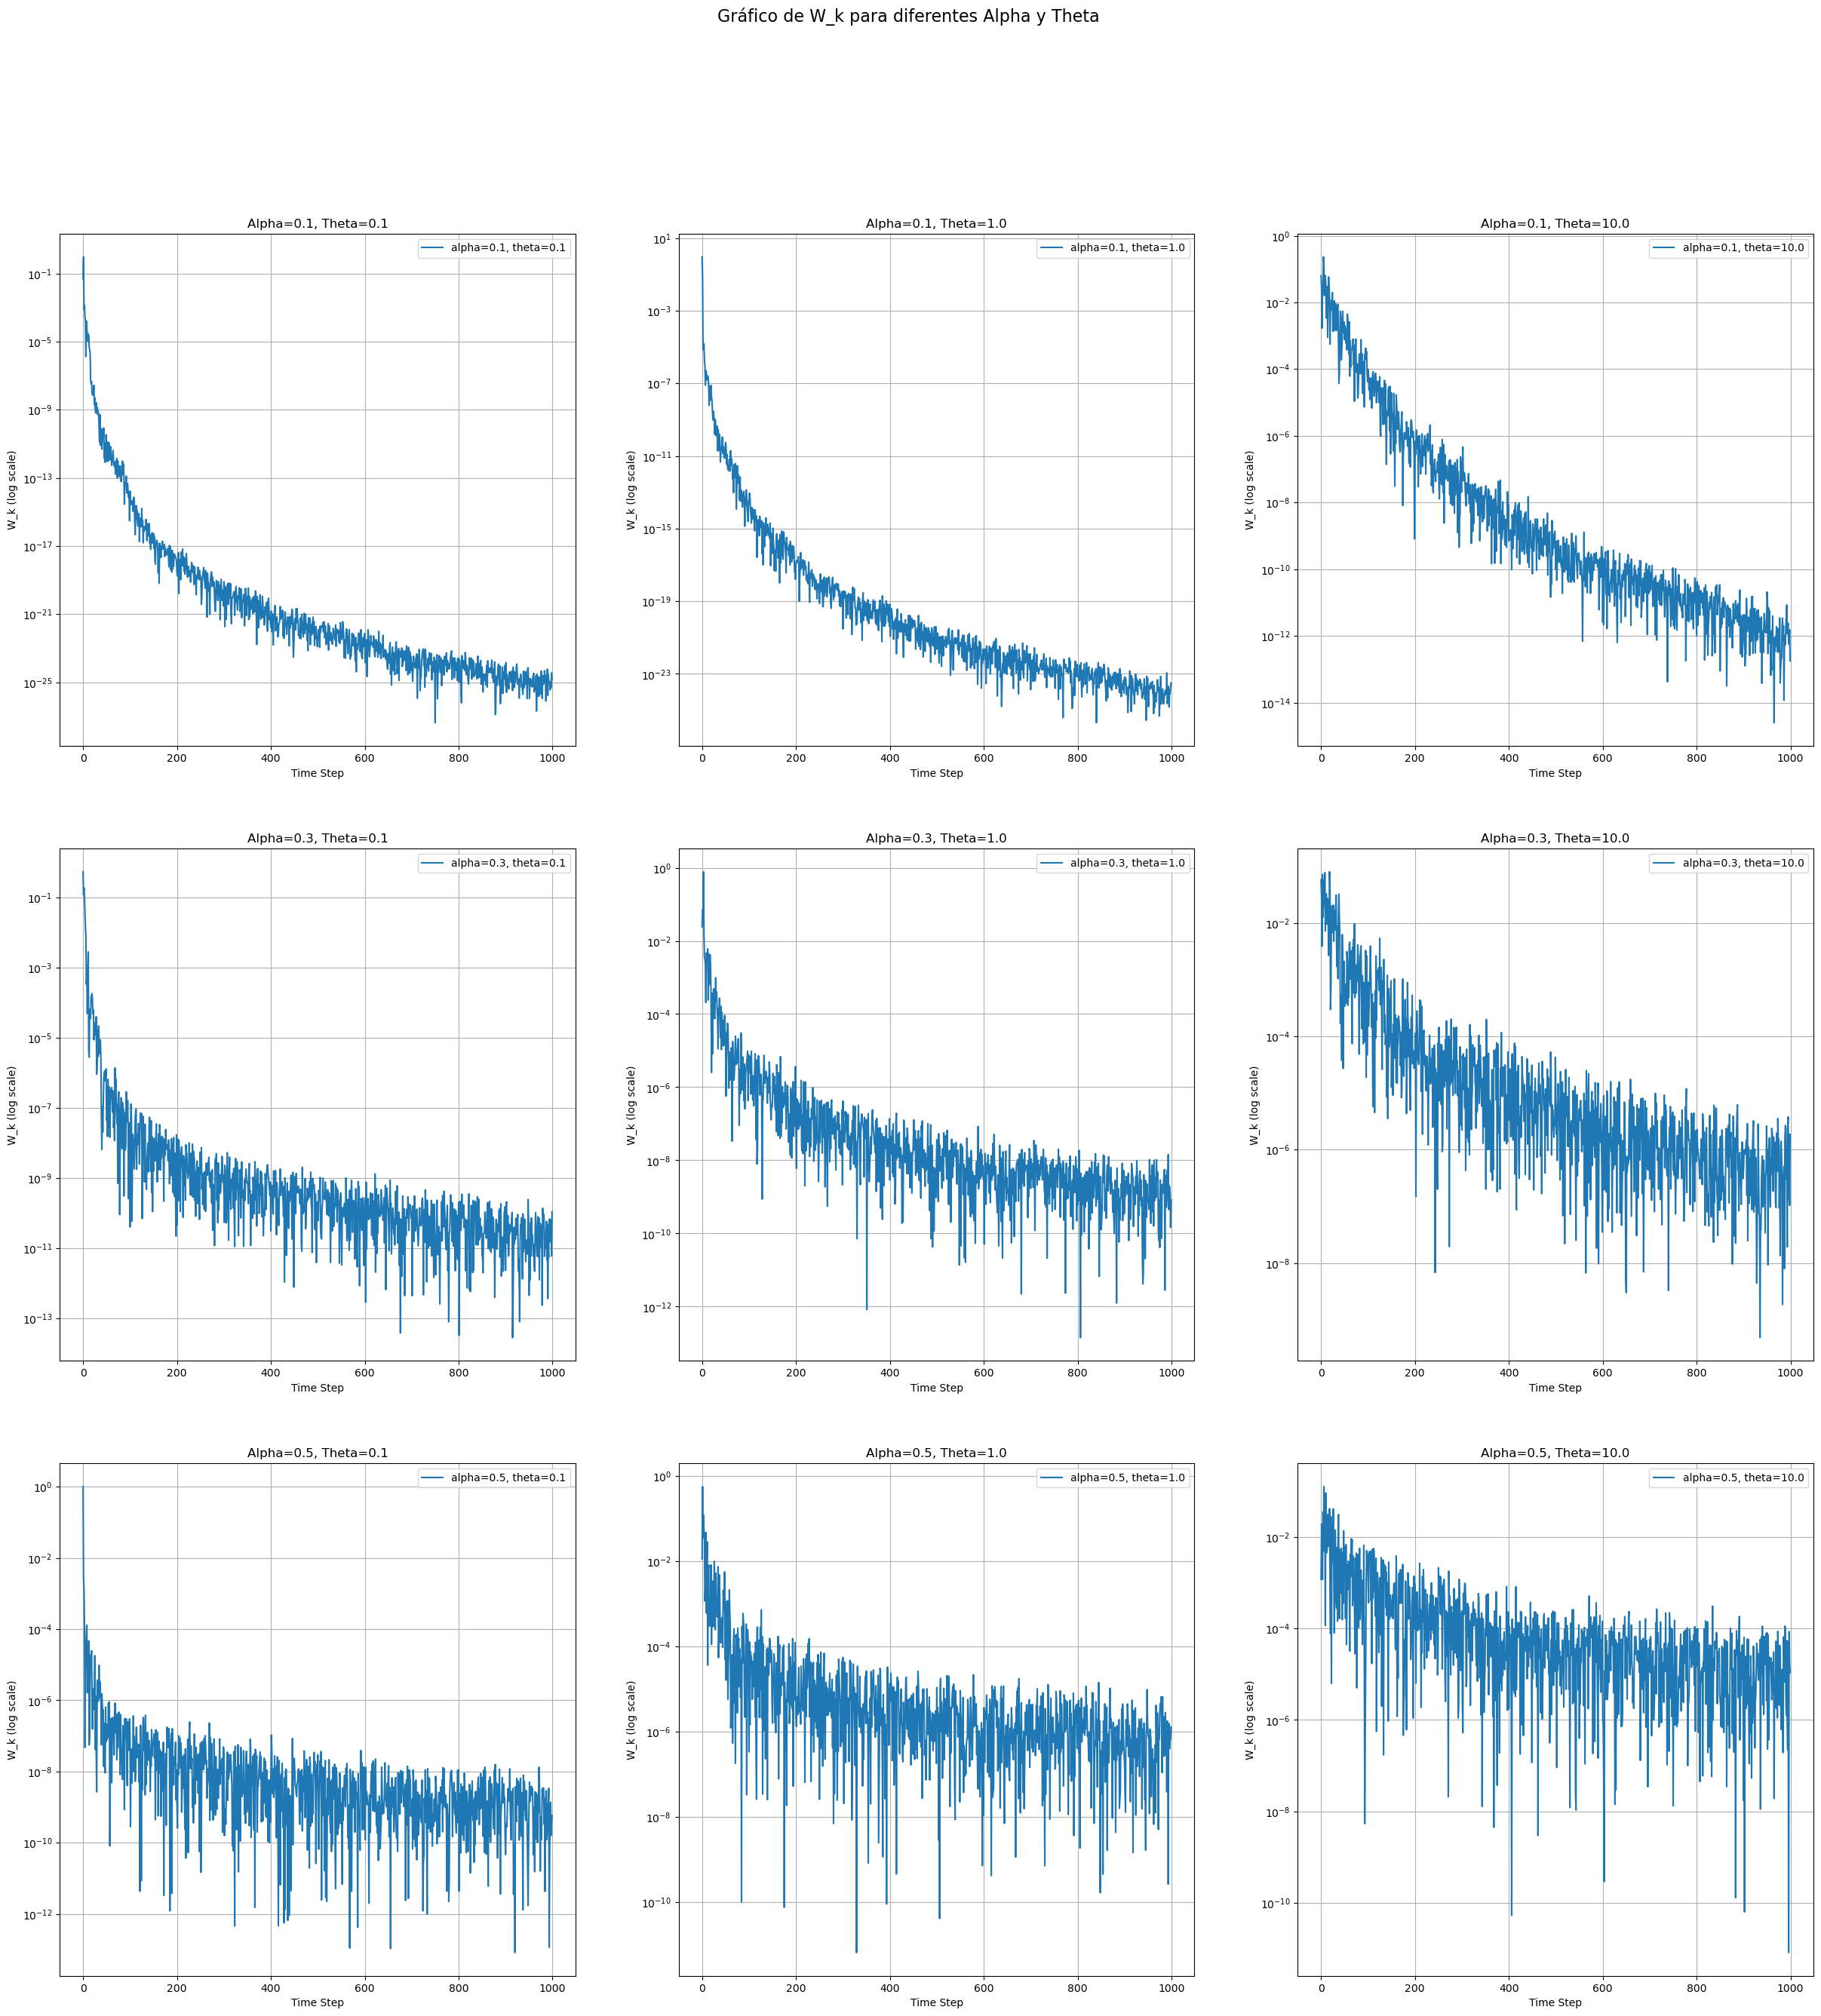

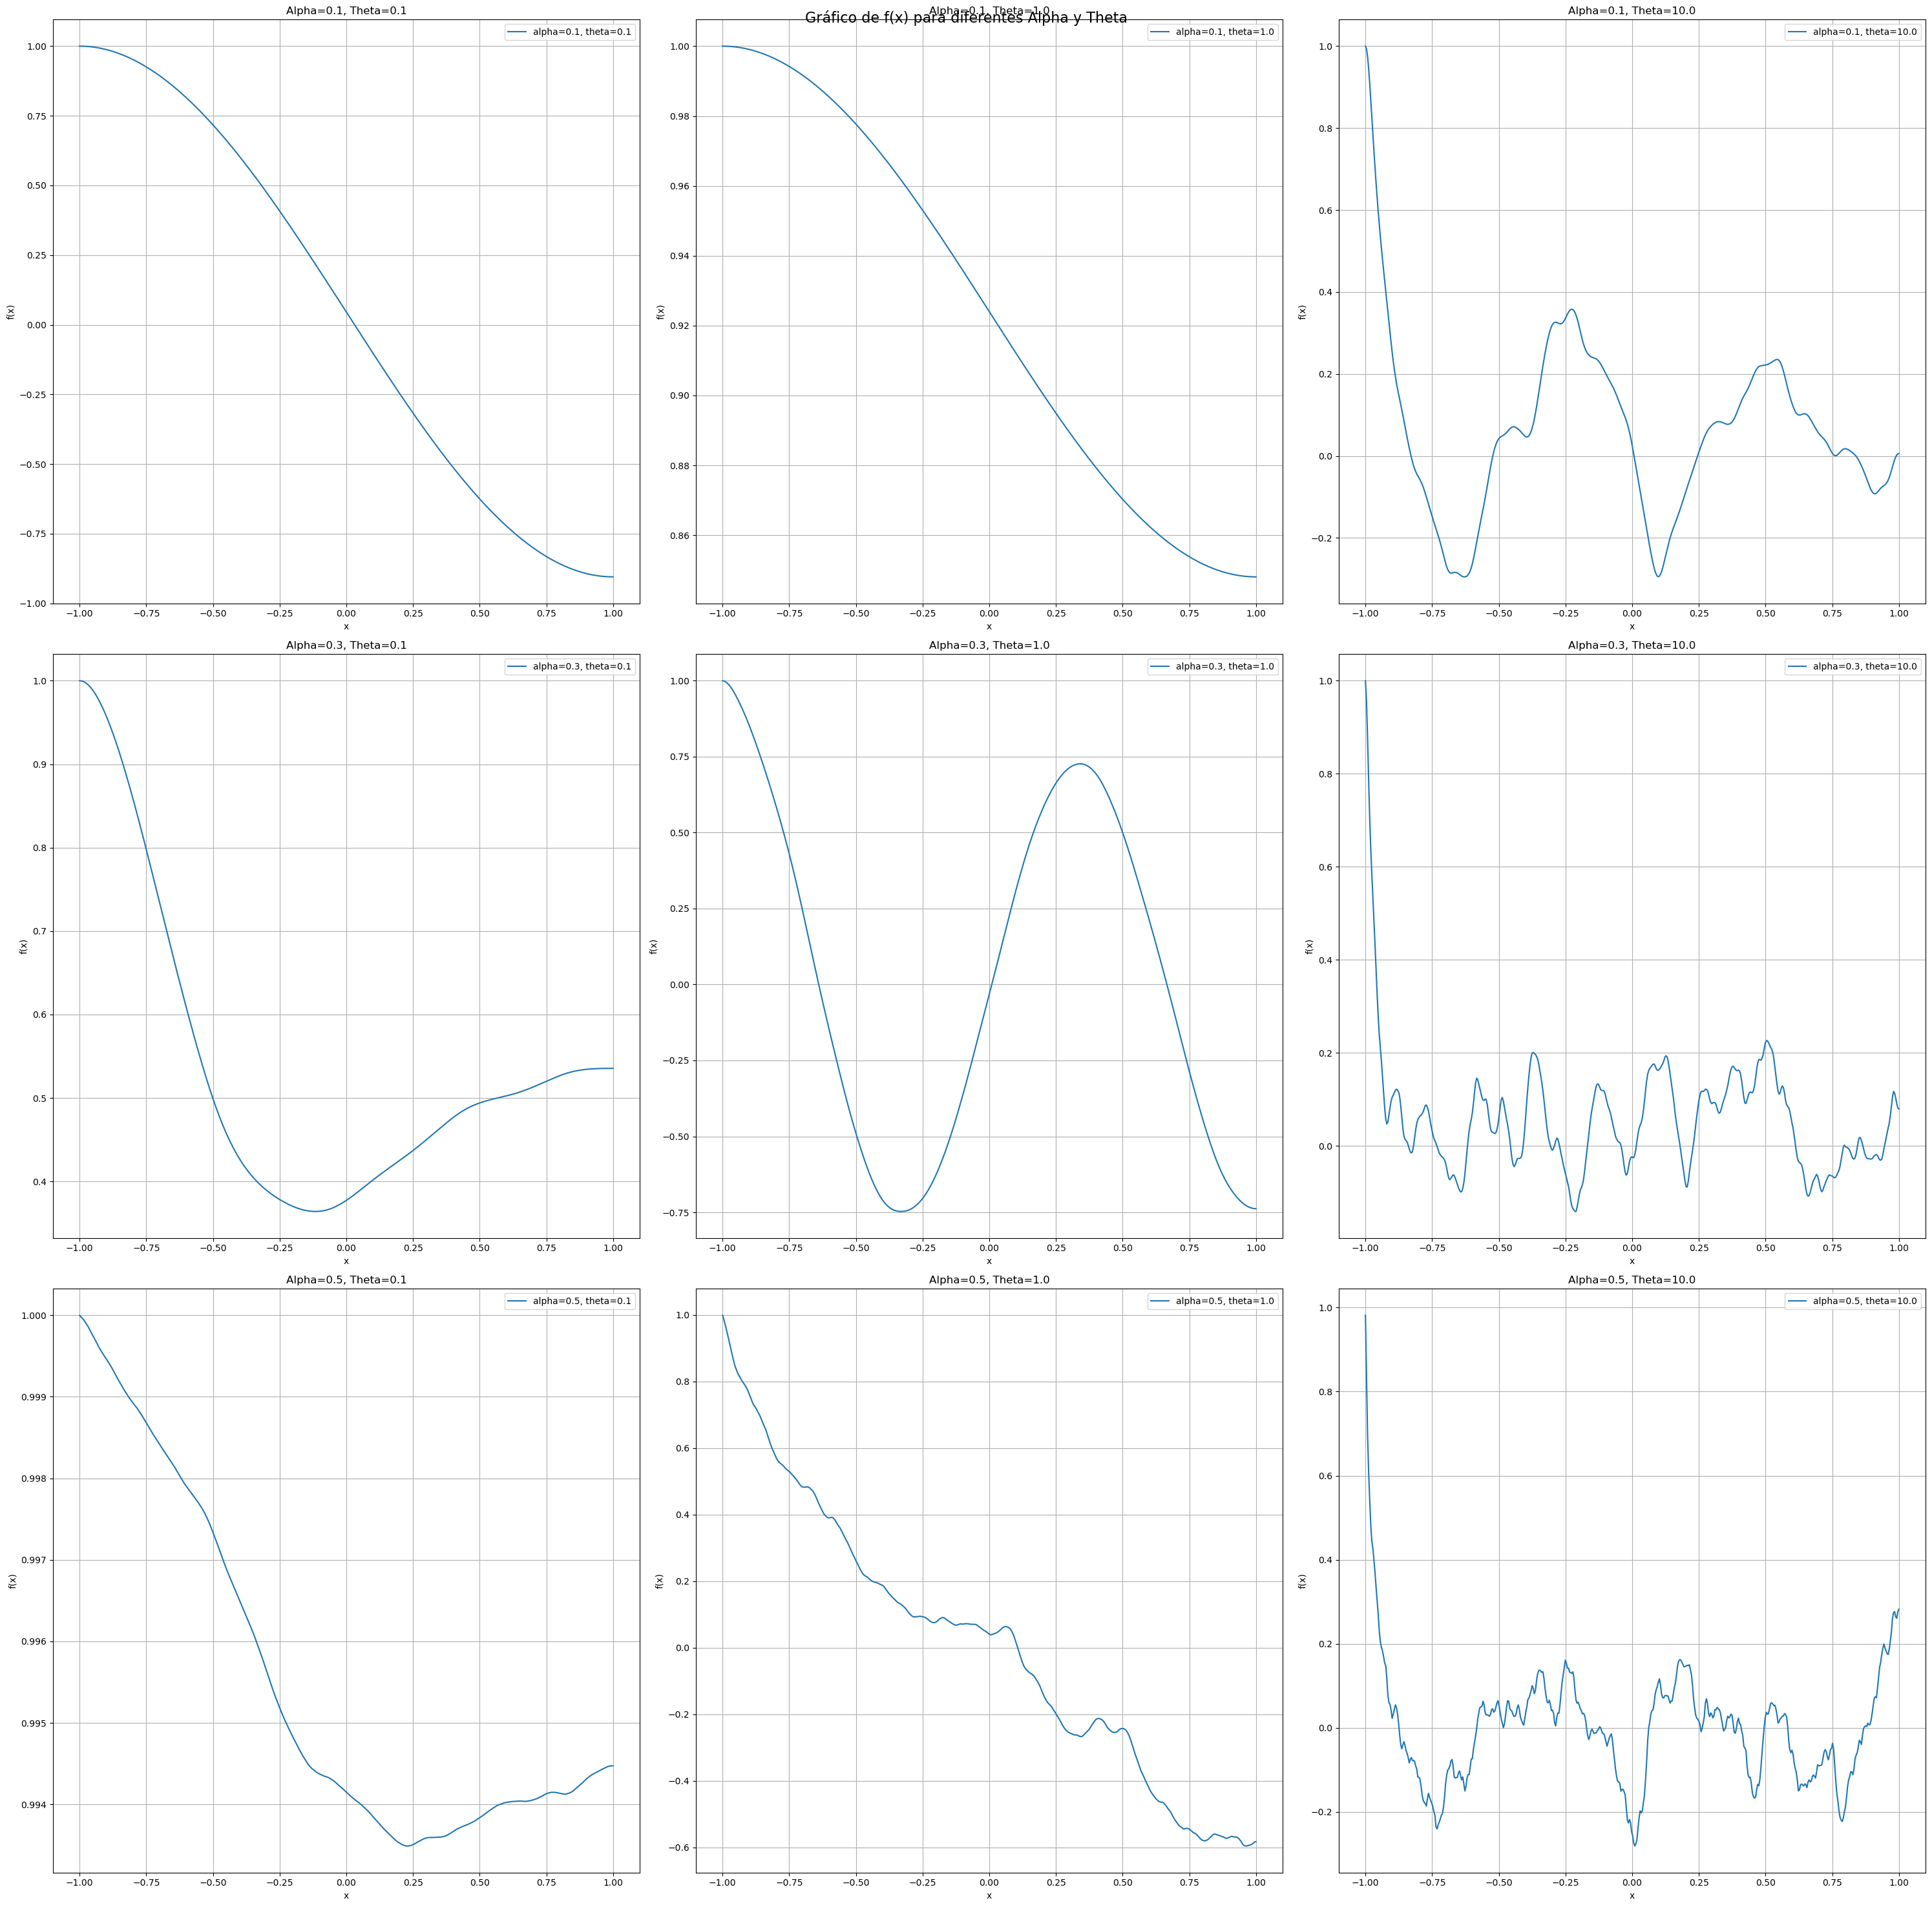

In [348]:
# Define parameters
n_max = 500
k_max = 1_000
alpha_values = [0.1, 0.3, 0.5]
theta_values = [0.1, 1, 10]
x_min = -1
x_max = 1
tol = 0.1

# Create grids of alpha and theta values
alpha_grid = np.array(alpha_values)
theta_grid = np.array(theta_values)

# Create a grid of x values
x = np.linspace(x_min, x_max, n_max)

# Create a 3x3 grid of plots
fig_Wk, axes_Wk = plt.subplots(3, 3, figsize=(30, 30))
fig_Wk.suptitle('Gráfico de W_k para diferentes Alpha y Theta', fontsize=16)

# Create a 3x3 grid of plots
fig_fx, axes_fx = plt.subplots(3, 3, figsize=(30, 30))
fig_fx.suptitle('Gráfico de f(x) para diferentes Alpha y Theta', fontsize=16)

# Iterar a través de los valores de alpha y theta
for i, alpha in enumerate(alpha_grid):
    for j, theta in enumerate(theta_grid):
        # Simular la serie de tiempo utilizando simulate_Wk
        Wk = simulate_Wk(k_max, alpha, theta)

        # Generate periodic base functions for different values of k
        functions = periodic_base(np.arange(0, k_max), x)
        
        # Calculate the function f by taking the dot product of functions and Wk
        f = functions.T @ Wk
        
        # Graficar la serie de tiempo en el subplot correspondiente
        ax_Wk = axes_Wk[i, j]
        ax_Wk.plot(np.arange(len(Wk)), Wk, label=f'alpha={alpha}, theta={theta}')
        ax_Wk.set_xlabel('Time Step')
        ax_Wk.set_ylabel('W_k (log scale)')
        ax_Wk.set_yscale('log')  # Establecer escala logarítmica en el eje Y
        ax_Wk.set_title(f'Alpha={alpha}, Theta={theta}')
        ax_Wk.grid(True)
        ax_Wk.legend()

        # Graficar la serie de tiempo en el subplot correspondiente
        ax_fx = axes_fx[i, j]
        ax_fx.plot(x, f, label=f'alpha={alpha}, theta={theta}')
        ax_fx.set_xlabel('x')
        ax_fx.set_ylabel('f(x)')
        ax_fx.set_title(f'Alpha={alpha}, Theta={theta}')
        ax_fx.grid(True)
        ax_fx.legend()

# Ajustar el espacio entre subplots
plt.tight_layout()

# Mostrar los gráficos
plt.show()

ValueError: x and y must have same first dimension, but have shapes (500,) and (1,)

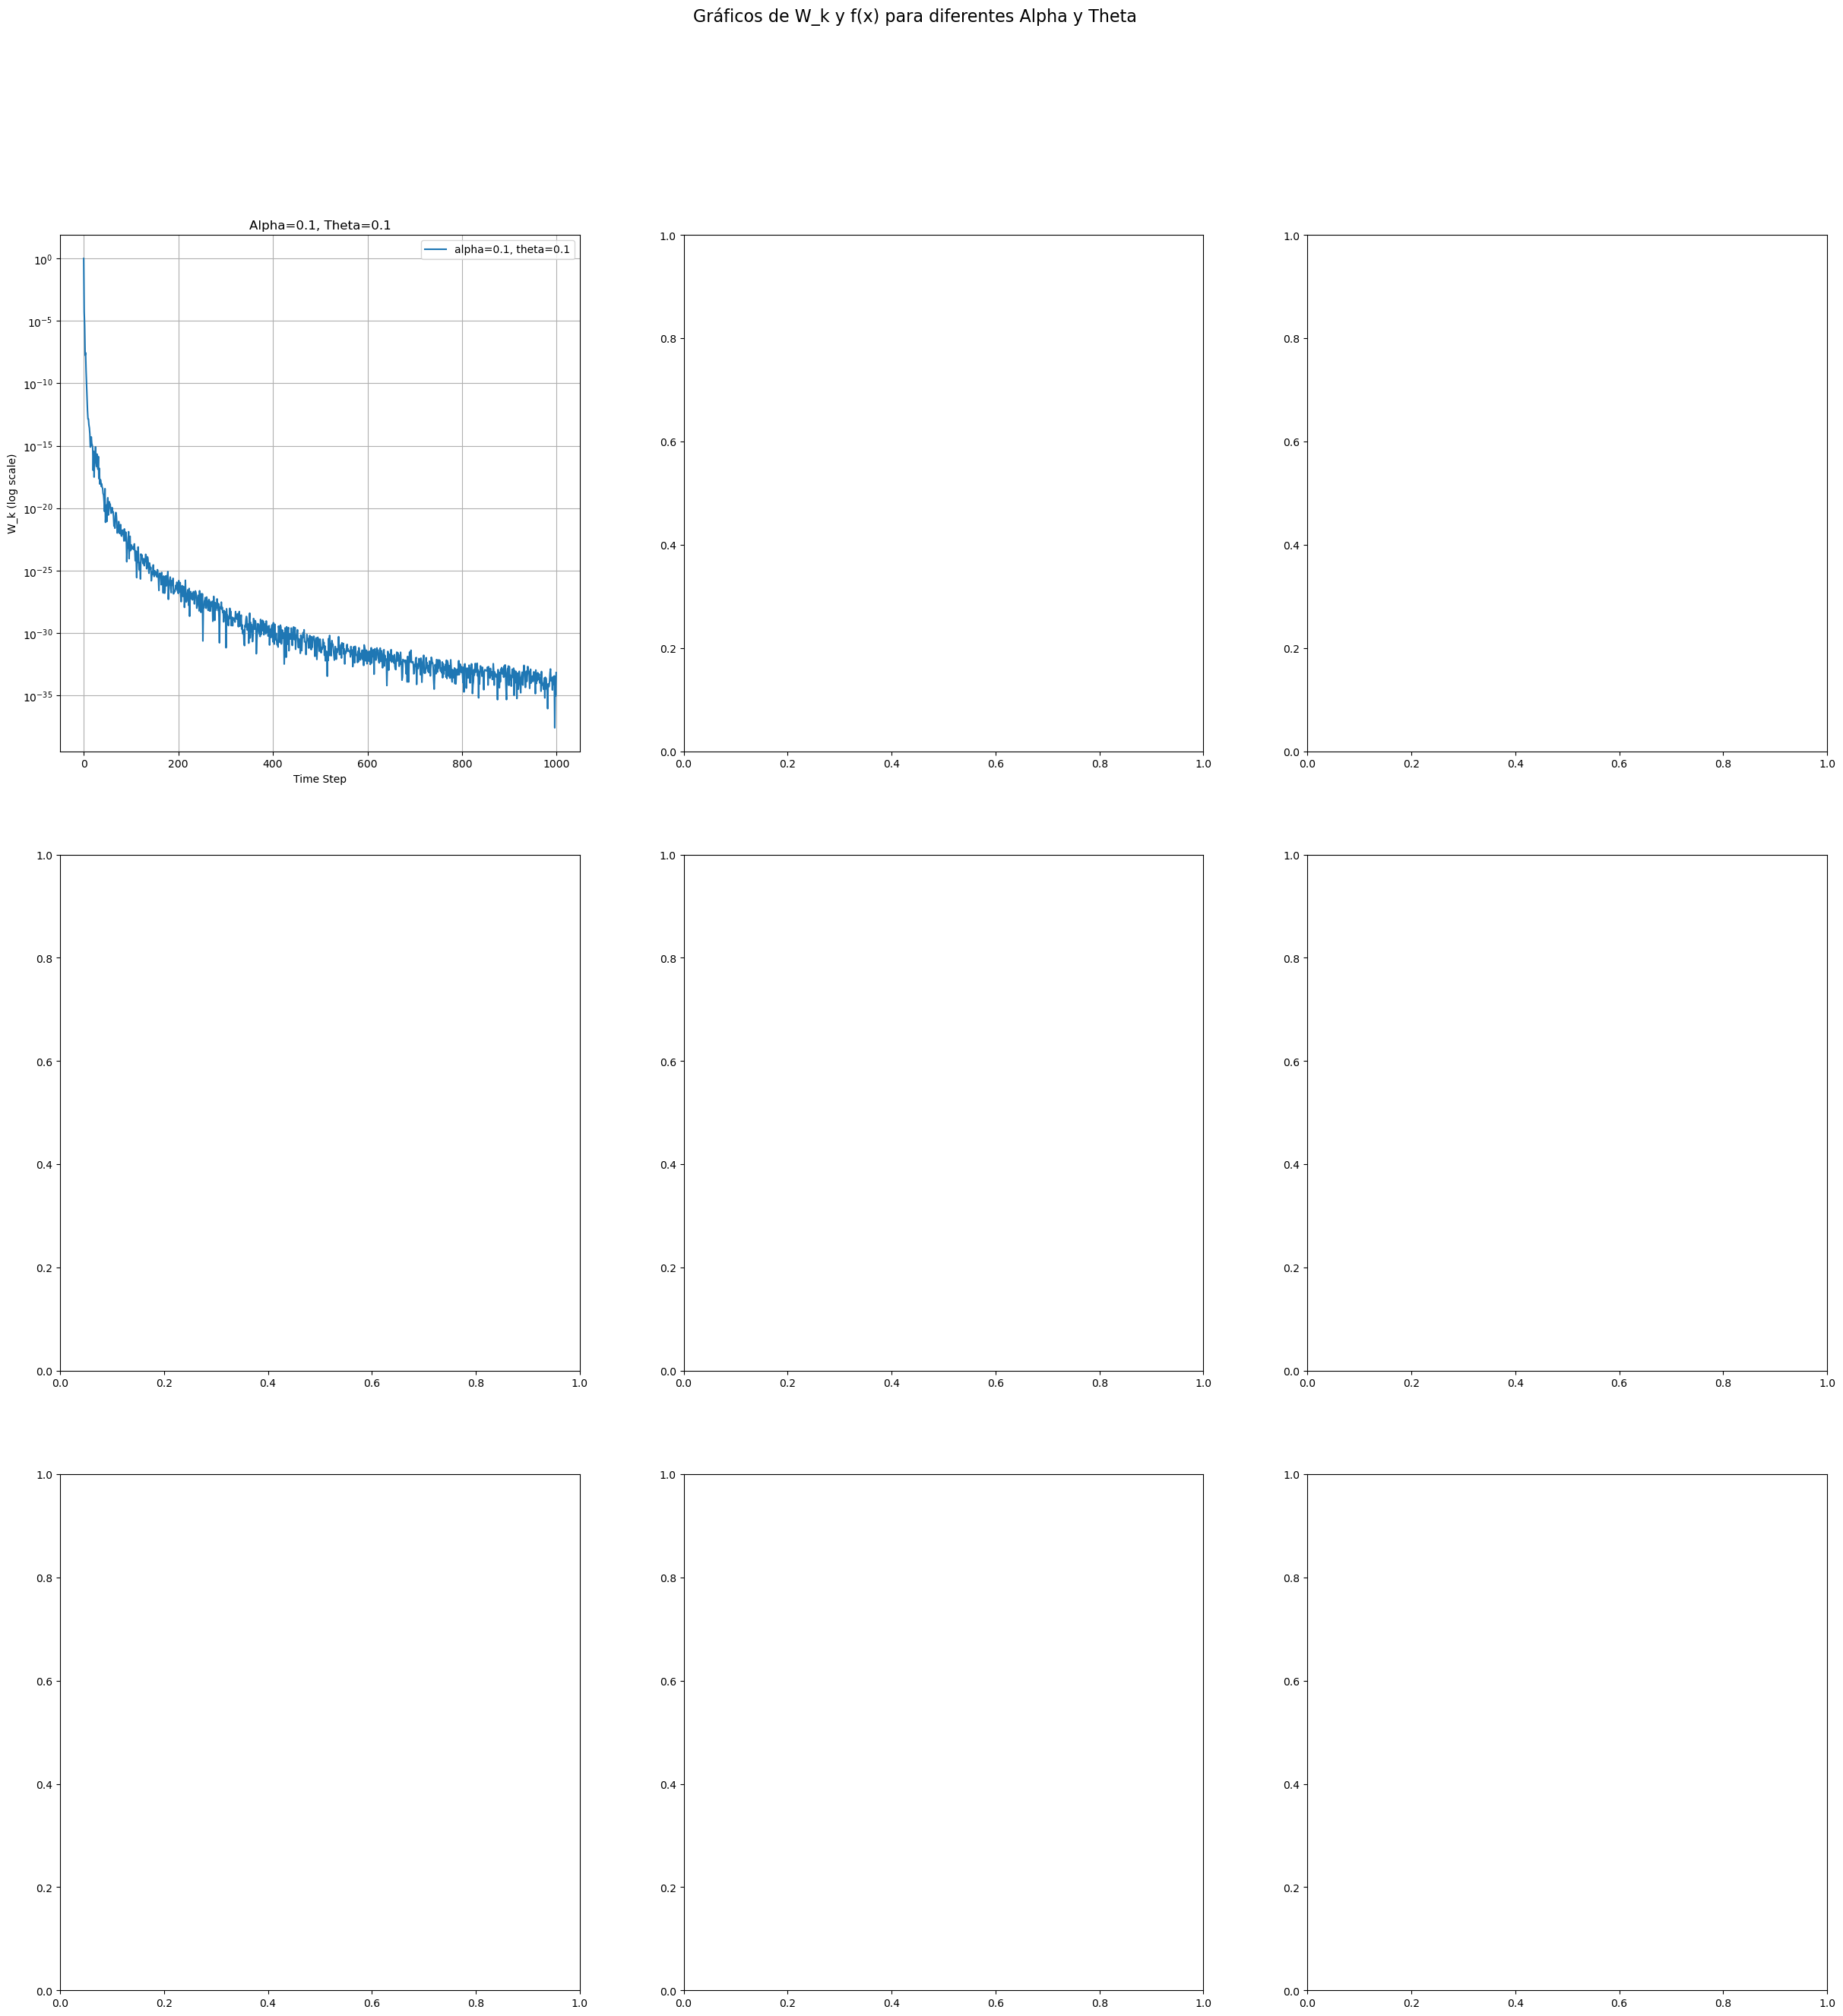

In [349]:
import numpy as np
import sympy as sp
import matplotlib.pyplot as plt

# Define the parameters
n_max = 500
k_max = 1_000
alpha_values = [0.1, 0.3, 0.5]
theta_values = [0.1, 1, 10]
x_min = -1
x_max = 1
tol = 0.1

# Create a grid of x values
x = np.linspace(x_min, x_max, n_max)

# Define the symbolic variables
x_sym = sp.symbols('x')
k_sym = sp.symbols('k')
Wk_sym = sp.symbols('Wk')

# Define the periodic base function using SymPy
def periodic_base(k, x):
    return sp.cos(k * sp.pi * (x + 1) / 2)

# Create a 3x3 grid of plots for Wk and f(x)
fig, axes = plt.subplots(3, 3, figsize=(30, 30))
fig.suptitle('Gráficos de W_k y f(x) para diferentes Alpha y Theta', fontsize=16)

# Iterate through the values of alpha and theta
for i, alpha in enumerate(alpha_values):
    for j, theta in enumerate(theta_values):
        # Simulate the Wk values using numpy (as before)
        Wk = simulate_Wk(k_max, alpha, theta, tol=tol, n_min=k_max)
        
        # Create a SymPy function for periodic_base
        periodic_func = periodic_base(k_sym, x_sym)

        # Calculate f(x) as a summation using SymPy's summation function
        f_sym = sp.Sum(periodic_func * Wk_sym, (k_sym, 0, k_max - 1))

        # Evaluate the summation to obtain a numerical result
        f_x = f_sym.subs({x_sym: x, Wk_sym: Wk}).evalf()

        # Plot Wk
        ax_Wk = axes[i, j]
        ax_Wk.plot(np.arange(len(Wk)), Wk, label=f'alpha={alpha}, theta={theta}')
        ax_Wk.set_xlabel('Time Step')
        ax_Wk.set_ylabel('W_k (log scale)')
        ax_Wk.set_yscale('log')
        ax_Wk.set_title(f'Alpha={alpha}, Theta={theta}')
        ax_Wk.grid(True)
        ax_Wk.legend()

        # Plot f(x)
        ax_fx = axes[i, j]
        ax_fx.plot(x, f_x, label=f'alpha={alpha}, theta={theta}')
        ax_fx.set_xlabel('x')
        ax_fx.set_ylabel('f(x)')
        ax_fx.set_title(f'Alpha={alpha}, Theta={theta}')
        ax_fx.grid(True)
        ax_fx.legend()


# Adjust spacing between subplots
plt.tight_layout(rect=[0, 0, 1, 0.95])

# Show the plots
plt.show()


### 2) Sean estríctamente crecientes en $L^2([0,1])$.

Sea $f(x)$ generada por el método anterior, por construcción es claro que $|f|\leq1$, por lo tanto $\exp(f(x))\leq e$ y por ende está en $L^2$. Note que $\exp(f(x))$ es una función estrictamente positiva, por lo tanto toda función $g$ tal que $g'(x)=\exp(f(x))$ es estrictamente creciente.

### 3) Sean positivas e integren 1 en $L^2([0,1])$

> No existe una base que cumpla estas carácteristicas, dado que si dos funciones de la base son positivas, entonces su producto y por ende su integral es positiva.

**Obs 1:** En cada pregunta debe de realizar un experimento de simulación que muestre los efectos de $\alpha$ y $\theta$.

**Obs 2:** Considere agregar otras distribuciones si es necesario.
